# 載入Library

In [24]:
import random
import matplotlib.pyplot as plt
import numpy as np

# 真值表

| X1 | X2 | Y |
|:---:|:---:|:---:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|


# 變數

In [25]:
# 真值表
andValue = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

# 學習率
lrate = 0.2

# 訓練次數
epoch = 10

# 輸出圖的範圍
picSize = 3

# 函式

In [26]:
# 亂數生成權重
def getWeight():
    weight = []
    for i in range(0,3):
        weight.append(int(random.randint(1,9))/10)
    return weight

In [27]:
# 權重要如何調整
def ADDorMINUS(weight,andValue):
    
    # 目前的權重乘以 X1、X2 加 Bias
    Y = weight[0]*andValue[0]+weight[1]*andValue[1]+list1[2]
    
    # 算出的Y代表0或1、threshold、門檻值、activation function
    if Y>=0:
        Y=1
    else:
        Y=0
    
    # 正確答案
    wantedY = andValue[2]
    
    # 對答案
    if Y < wantedY: # add
        return 1
    elif Y == wantedY: # do nothing
        return 0
    else: # minus
        return -1

In [28]:
# 畫出結果
def draw(weight):
    
    # 定義範圍
    plt.xlim(-picSize, picSize)
    plt.ylim(-picSize, picSize)
    
    # 調整XY軸位置
    ax = plt.gca()
    ax.spines['bottom'].set_position(('data', 0)) # X軸
    ax.spines['left'].set_position(('data', 0)) # Y軸
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    

    # Y為0(紅)、Y為1(藍)
    for (x1,x2,y) in andValue:
        if y == 0:
            plt.plot([x1],[x2],'ro')
        else:
            plt.plot([x1],[x2],'bo')

    # 畫線
    X1 = np.linspace(-picSize,picSize,10)  # 在-3到3之間生成10個X1值
    X2 = [(-weight[2]-weight[0]*k)/weight[1] for k in X1] # 對上述生成的10個數循環求對應的X2
    plt.plot(X1,X2,'c-')  # 用生成的10個 X1 X2 值對生成10個點
    
    plt.show()

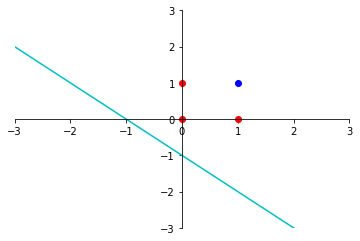

In [29]:
draw([0.5,0.5,0.5])

In [32]:
# 列出與權重對應的函式
def getFunc(weight):
    if -weight[2]/weight[1] < 0:
        print('y(x) = '+str(-weight[0]/weight[1])+'x '+str(-weight[2]/weight[1]))
    else:
         print('y(x) = '+str(-weight[0]/weight[1])+'x +'+str(-weight[2]/weight[1]))

# Main

epoch = 0 i = 0
W = [ 0.6  0.9  0.6]
sign: -1
 
epoch = 0 i = 1
W = [ 0.6  0.9 -0.4]
sign: -1
 
epoch = 0 i = 2
W = [ 0.6 -0.1 -1.4]
sign: 0
 
epoch = 0 i = 3
W = [ 0.6 -0.1 -1.4]
sign: 1
 
epoch = 1 i = 0
W = [ 1.6  0.9 -0.4]
sign: 0
 
epoch = 1 i = 1
W = [ 1.6  0.9 -0.4]
sign: -1
 
epoch = 1 i = 2
W = [ 1.6 -0.1 -1.4]
sign: -1
 
epoch = 1 i = 3
W = [ 0.6 -0.1 -2.4]
sign: 1
 
epoch = 2 i = 0
W = [ 1.6  0.9 -1.4]
sign: 0
 
epoch = 2 i = 1
W = [ 1.6  0.9 -1.4]
sign: 0
 
epoch = 2 i = 2
W = [ 1.6  0.9 -1.4]
sign: -1
 
epoch = 2 i = 3
W = [ 0.6  0.9 -2.4]
sign: 1
 
epoch = 3 i = 0
W = [ 1.6  1.9 -1.4]
sign: 0
 
epoch = 3 i = 1
W = [ 1.6  1.9 -1.4]
sign: -1
 
epoch = 3 i = 2
W = [ 1.6  0.9 -2.4]
sign: 0
 
epoch = 3 i = 3
W = [ 1.6  0.9 -2.4]
sign: 0
 
epoch = 4 i = 0
W = [ 1.6  0.9 -2.4]
sign: 0
 
epoch = 4 i = 1
W = [ 1.6  0.9 -2.4]
sign: 0
 
epoch = 4 i = 2
W = [ 1.6  0.9 -2.4]
sign: 0
 
epoch = 4 i = 3
W = [ 1.6  0.9 -2.4]
sign: 0
 
y(x) = -1.77777777778x +2.66666666667


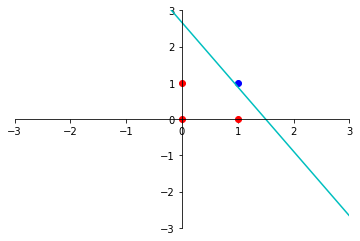

In [37]:
#亂數取得權重
W = np.array(getWeight())

for j in range(0,epoch):
    
    # 是否繼續修正
    totalError = 0
    
    #一輪、batch
    for i in range(0, len(andValue)): 
        
        print('epoch = '+str(j)+' i = '+str(i))
        print('W = '+str(W))
        
        # 加或減
        sign = ADDorMINUS(W,andValue[i])
        print('sign: '+str(sign))
        
        # 調整權重
        if sign == 1: # 加
            W = np.add(W, [andValue[i][0],andValue[i][1],1])
            totalError += 1
        elif sign == -1: # 減
            W = np.subtract(W, [andValue[i][0],andValue[i][1],1])
            totalError += 1
            
        # 解決draw()中除以0情況
        if W[1] == 0: 
            W[1] = 0.0000000000001
            
        print(' ')
        
        
    # 一輪中四次都沒修正權重時，停止迴圈
    if totalError == 0:
        break

# 列出最後函式
getFunc(W)

# 畫出結果
draw(W)